In [31]:
import matplotlib.pyplot as plt

from network import Network
from activations import *
from losses import *
from regularizers import *
from utils import read_monk, Range_random
from metrics import Accuracy

# Testing Monk's Problems

## Monk 1

In [32]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-1.train', test_path='../data/monk/monks-1.test')

In [33]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-2)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-5),
    momentum=('Standard', 0.5)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(lambda_=1e-5),
    momentum=('Standard', 0.5)
)

In [34]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=3500,
    patience=100,
    metric=Accuracy()
)

Epochs:  75%|███████▌  | 2634/3500 [00:41<00:13, 62.73it/s]


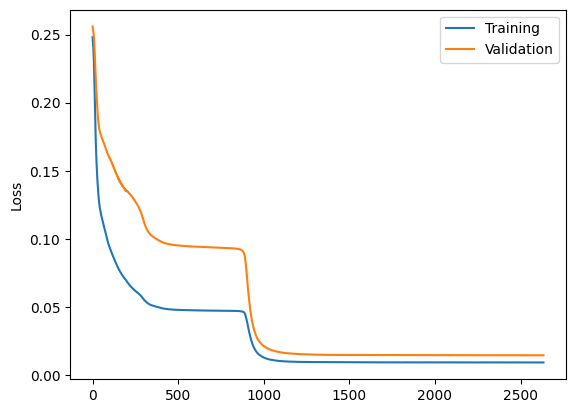

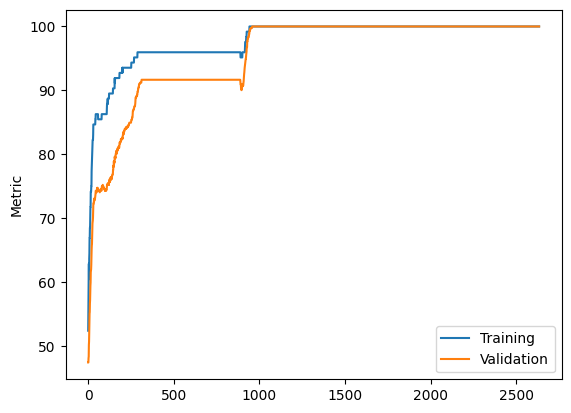

In [35]:
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Validation')
plt.legend()
plt.ylabel('Metric')
plt.show()

In [36]:
print(net.statistics(X_test, y_test, Accuracy()))

(0.014499242632016978, 100.0)


## Monk 2

In [37]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-2.train', test_path='../data/monk/monks-2.test')

In [38]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-2)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-5),
    momentum=('Standard', 0.5)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(lambda_=1e-5),
    momentum=('Standard', 0.5)
)

In [39]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=3500,
    patience=100,
    metric=Accuracy()
)

Epochs:  84%|████████▍ | 2937/3500 [00:58<00:11, 50.63it/s]


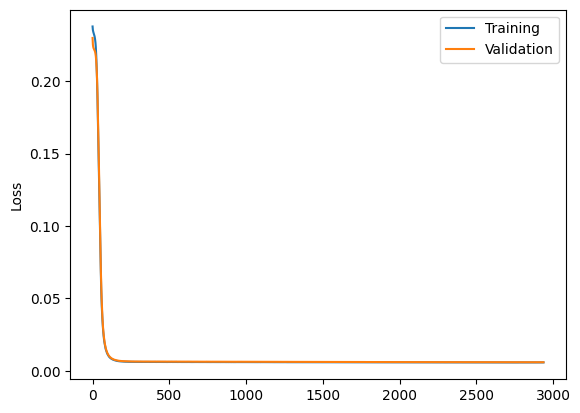

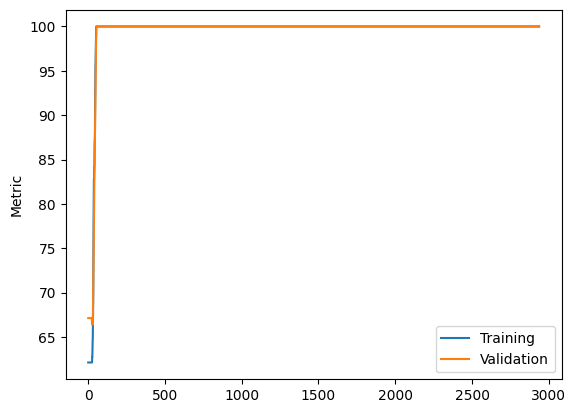

In [40]:
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Validation')
plt.legend()
plt.ylabel('Metric')
plt.show()

In [41]:
print(net.statistics(X_test, y_test, Accuracy()))

(0.005897715708058004, 100.0)


## Monk 3

In [42]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-3.train', test_path='../data/monk/monks-3.test')

In [43]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-2)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(lambda_=1e-5),
    momentum=('Standard', 0.5)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(lambda_=1e-5),
    momentum=('Standard', 0.5)
)

In [44]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=3500,
    patience=100,
    metric=Accuracy()
)

Epochs:  16%|█▌        | 546/3500 [00:09<00:50, 58.60it/s]


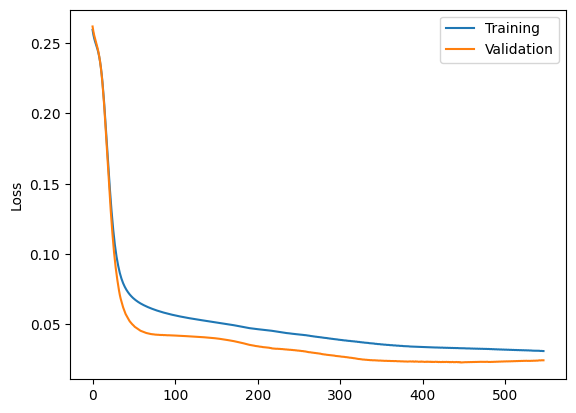

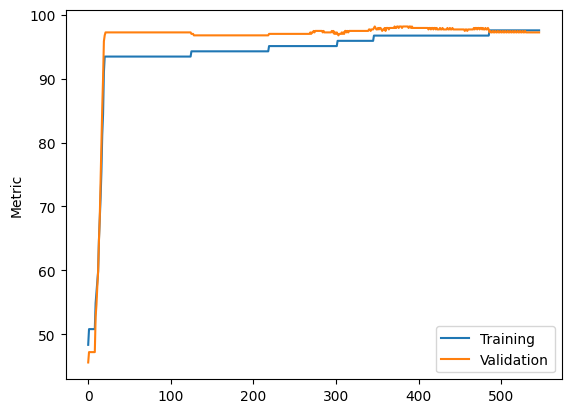

In [45]:
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Validation')
plt.legend()
plt.ylabel('Loss')
plt.show()

plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Validation')
plt.legend()
plt.ylabel('Metric')
plt.show()

In [46]:
print(net.statistics(X_test, y_test, Accuracy()))

(0.023012443184930505, 97.68518518518519)
